### Final Project

#### Dataset: StudentsPerformance.csv
The dataset being used includes math, reading, and writing test scores with the demographics of the test taker. The goal is to do some data analysis on test scores and demographics, and then apply a couple machine learning prediction algorithms.

#### Setup: Load libraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

/Users/brandon/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### Load the dataset

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(dataset)

df.columns = ["gender", "race_group", "parent_education", "lunch_type", "test_prep", "math_score", "reading_score", "writing_score"]

#### View the dataframe

In [3]:
df

,gender,race_group,parent_education,lunch_type,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Exploratory Data Analysis

#### General statistics

In [4]:
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


#### Score distribution

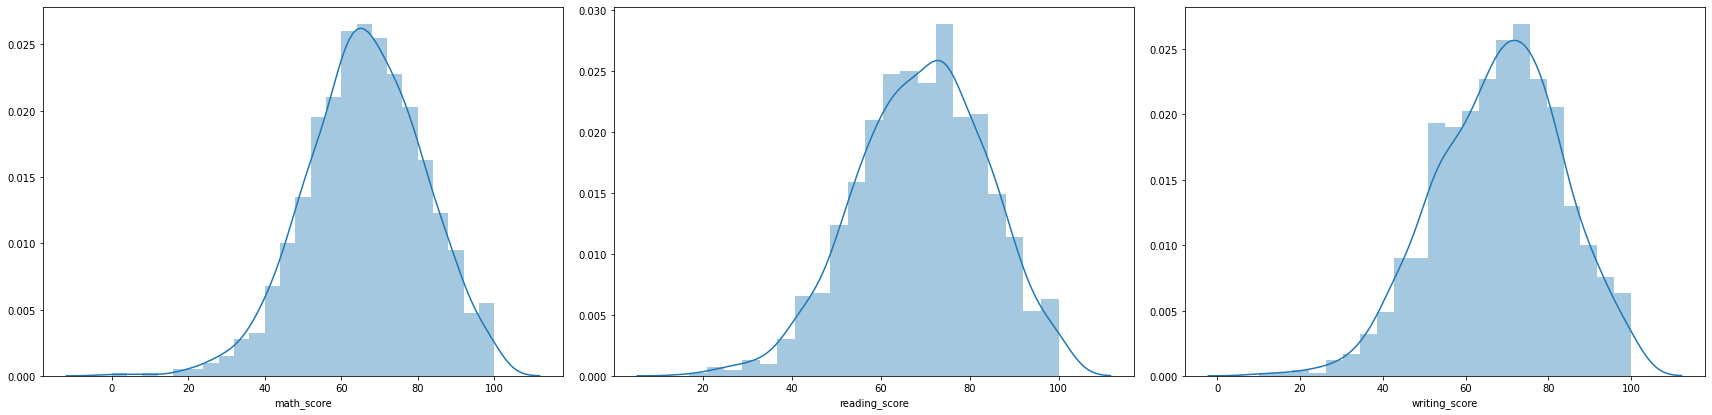

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.distplot(df["math_score"], ax=ax[0])
sns.distplot(df["reading_score"], ax=ax[1])
sns.distplot(df["writing_score"], ax=ax[2])
plt.tight_layout(pad=1.5)

#### Correlation heatmap (unnormalized data)

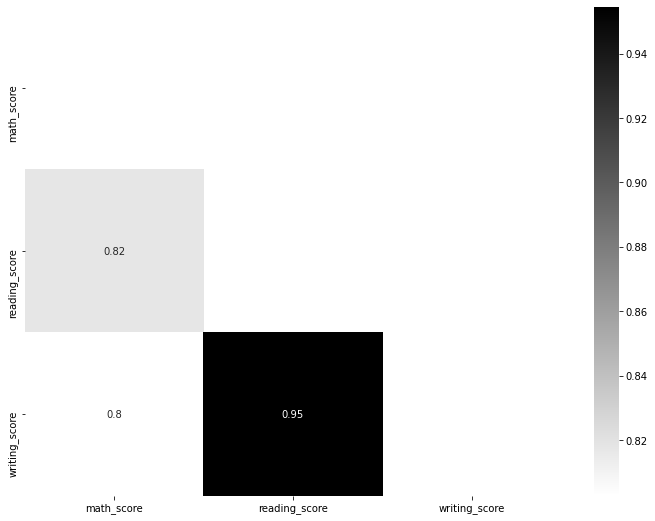

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap="gray_r")

#### Comparing scores (gender)

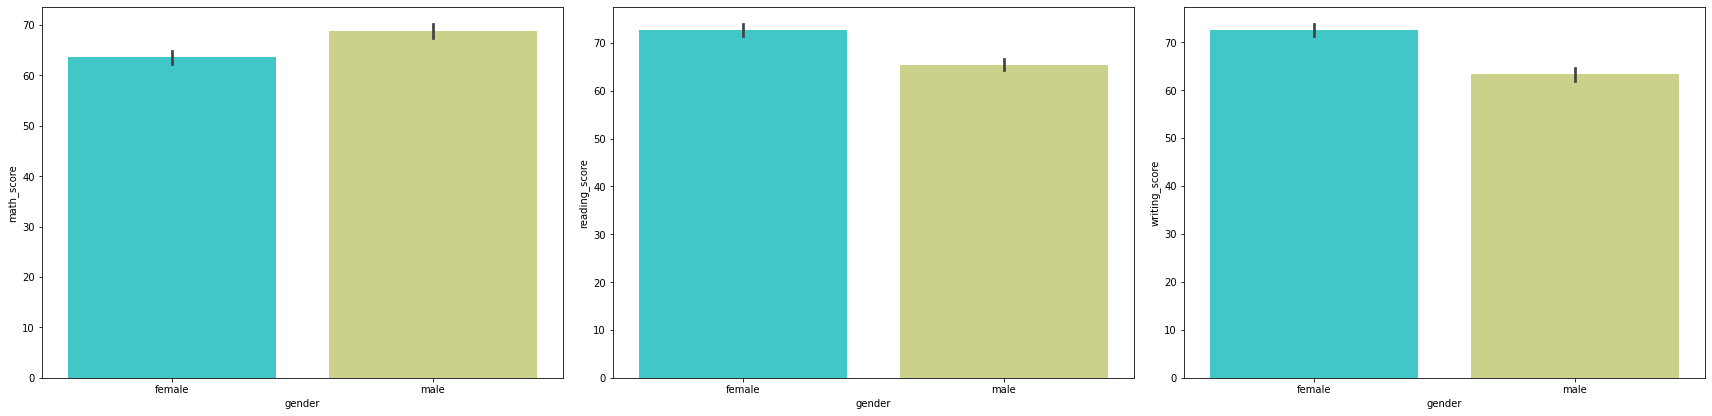

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.barplot(x="gender", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.barplot(x="gender", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.barplot(x="gender", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Comparing scores (race_group)

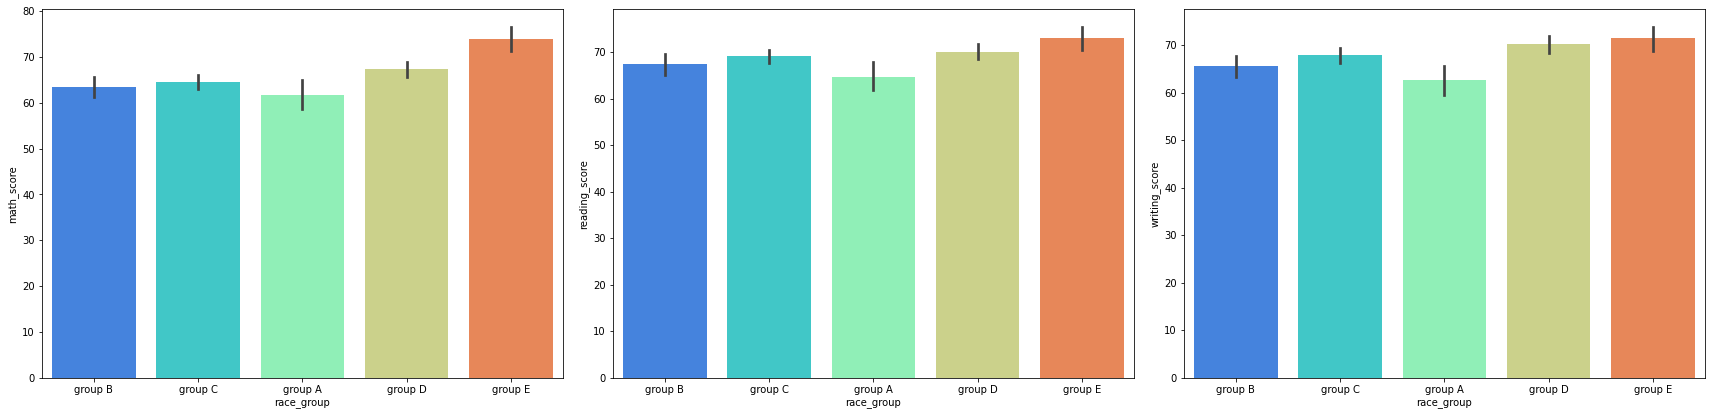

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.barplot(x="race_group", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.barplot(x="race_group", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.barplot(x="race_group", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Comparing scores (parent_education)

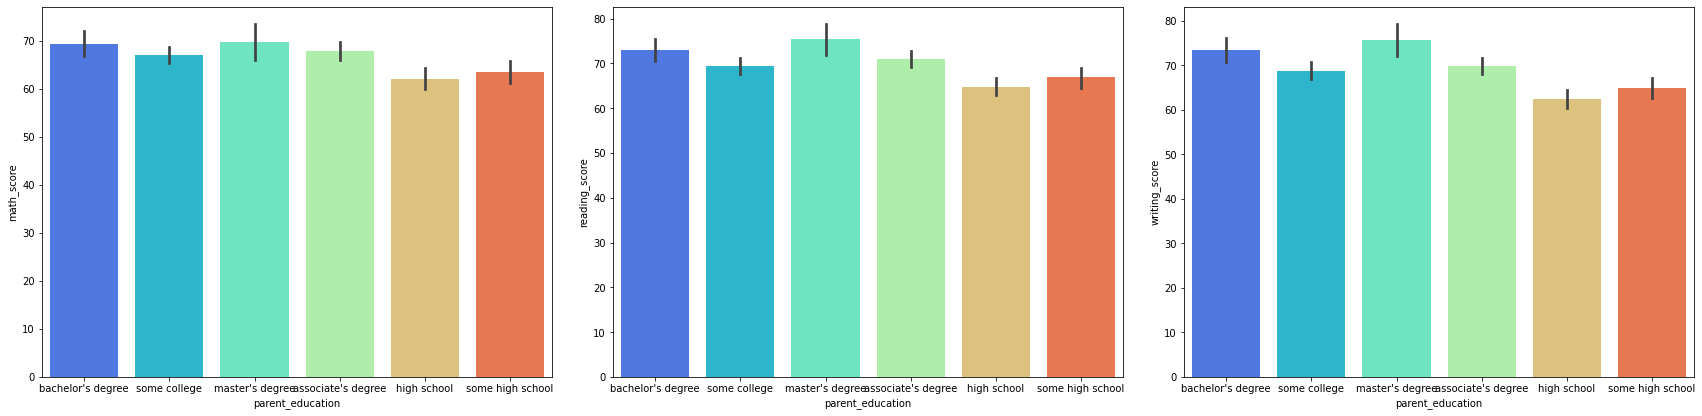

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.barplot(x="parent_education", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.barplot(x="parent_education", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.barplot(x="parent_education", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Comparing scores (lunch_type)

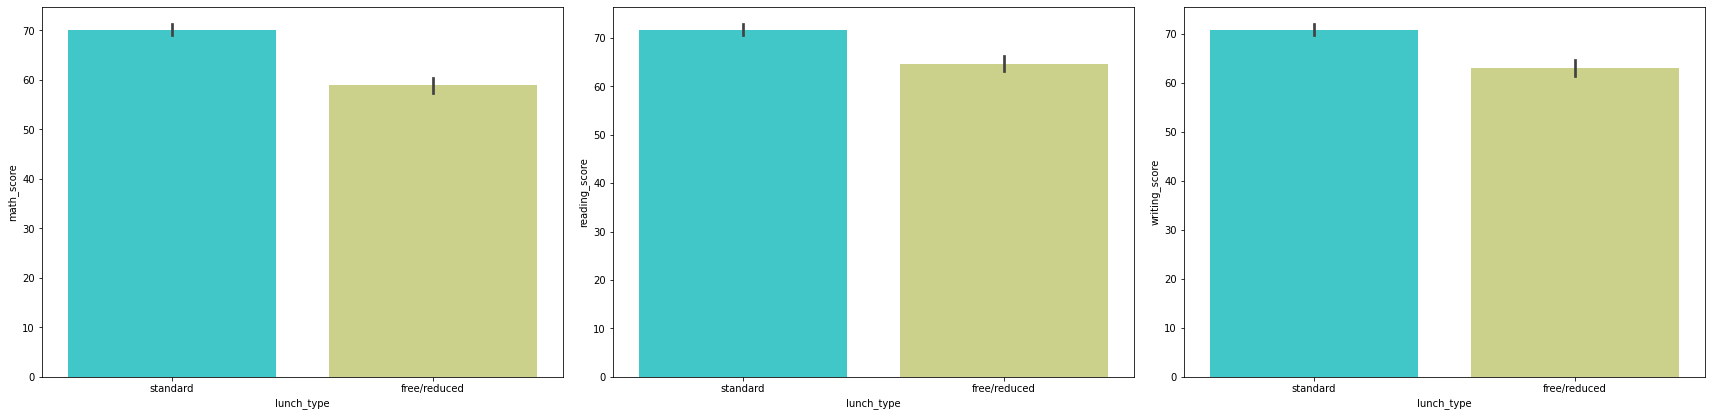

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.barplot(x="lunch_type", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.barplot(x="lunch_type", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.barplot(x="lunch_type", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Comparing scores (test_prep)

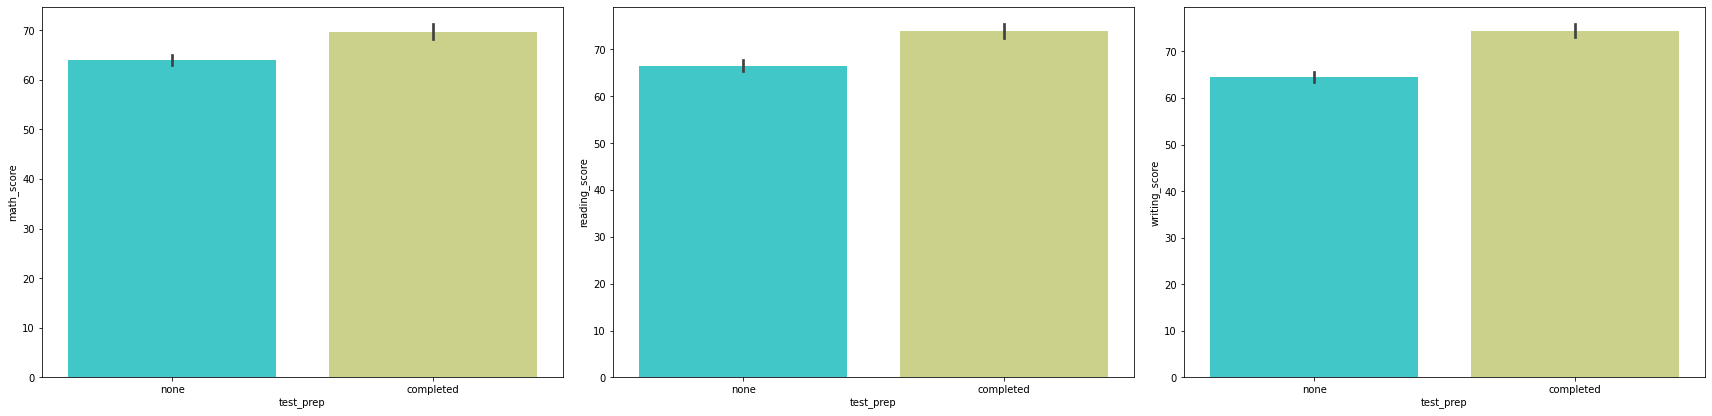

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.barplot(x="test_prep", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.barplot(x="test_prep", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.barplot(x="test_prep", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Outliers and distribution in scores (gender)

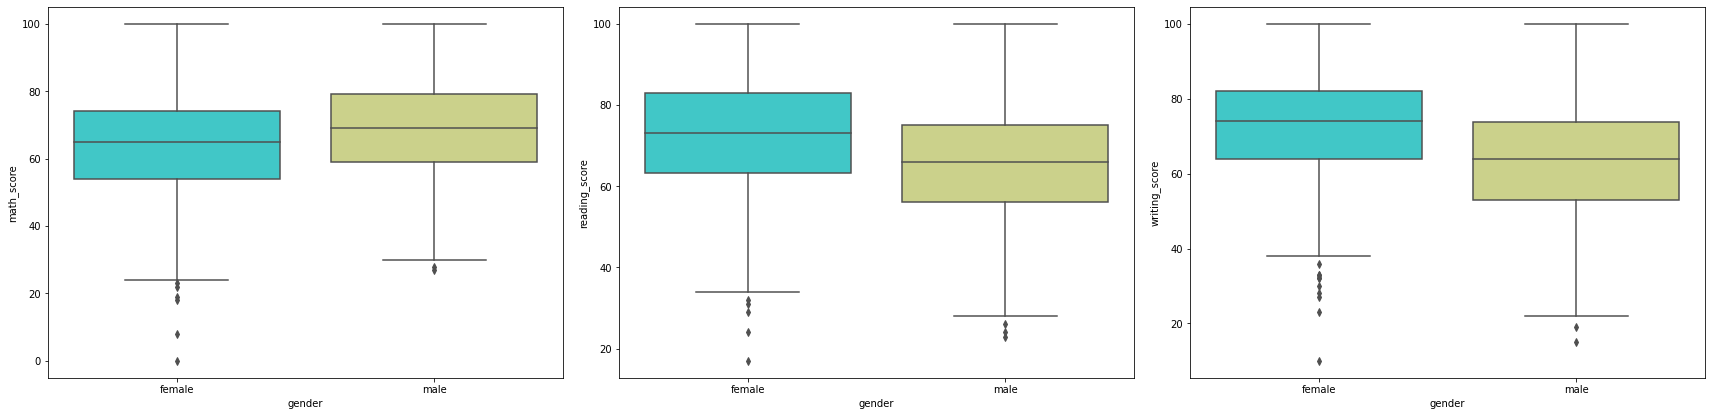

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.boxplot(x="gender", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.boxplot(x="gender", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.boxplot(x="gender", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Outliers and distribution in scores (race_group)

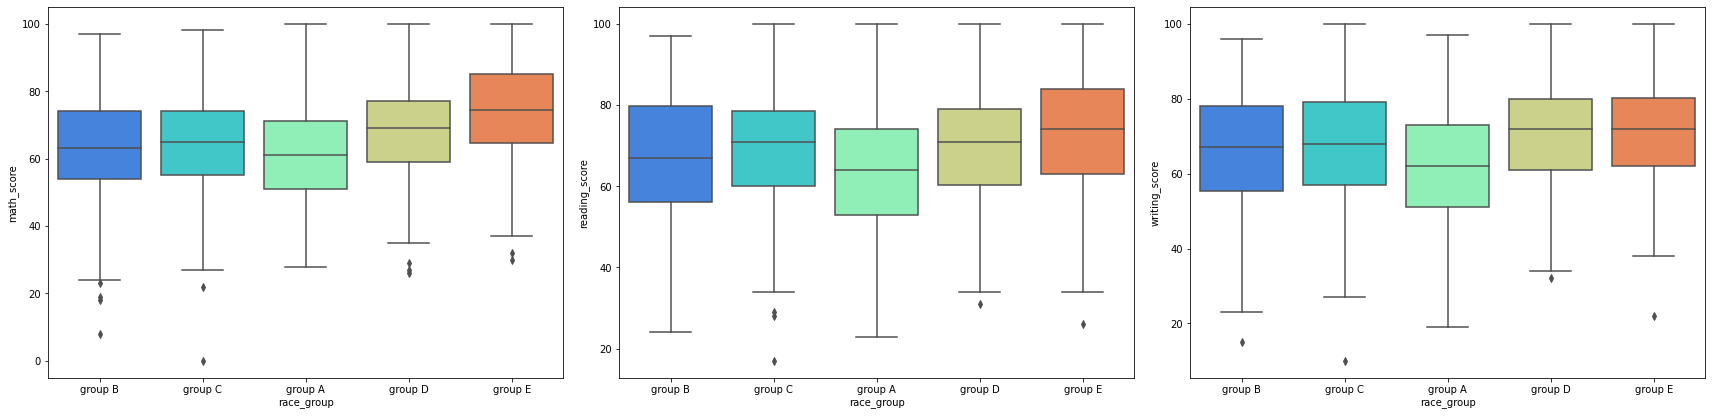

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.boxplot(x="race_group", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.boxplot(x="race_group", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.boxplot(x="race_group", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Outliers and distribution in scores (parent_education)

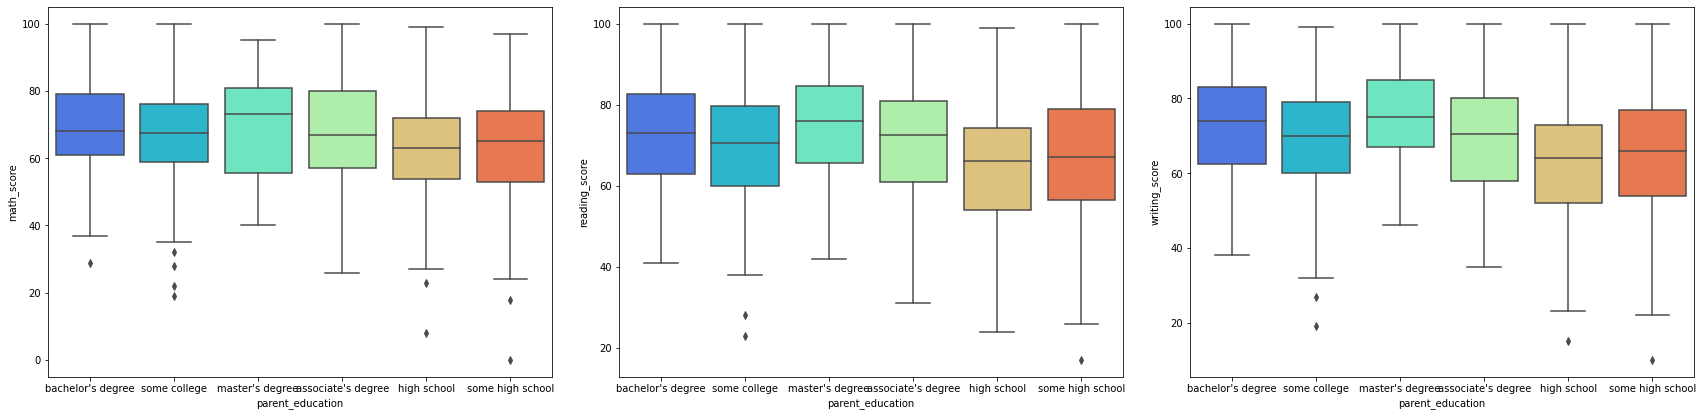

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.boxplot(x="parent_education", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.boxplot(x="parent_education", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.boxplot(x="parent_education", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Outliers and distribution in scores (lunch_type)

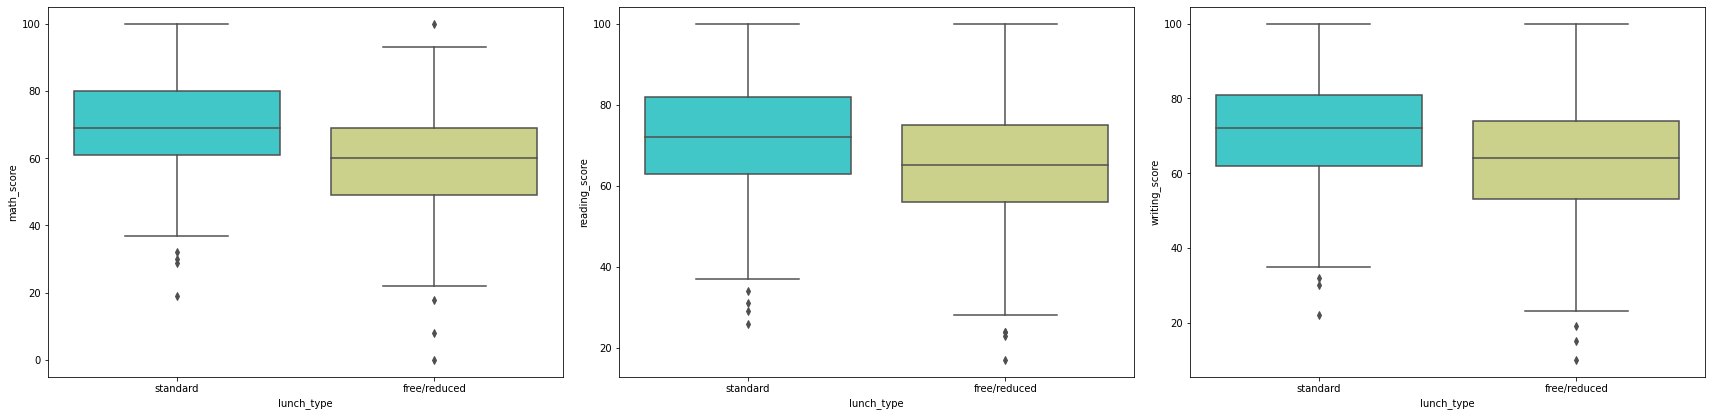

In [15]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.boxplot(x="lunch_type", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.boxplot(x="lunch_type", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.boxplot(x="lunch_type", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Outliers and distribution in scores (test_prep)

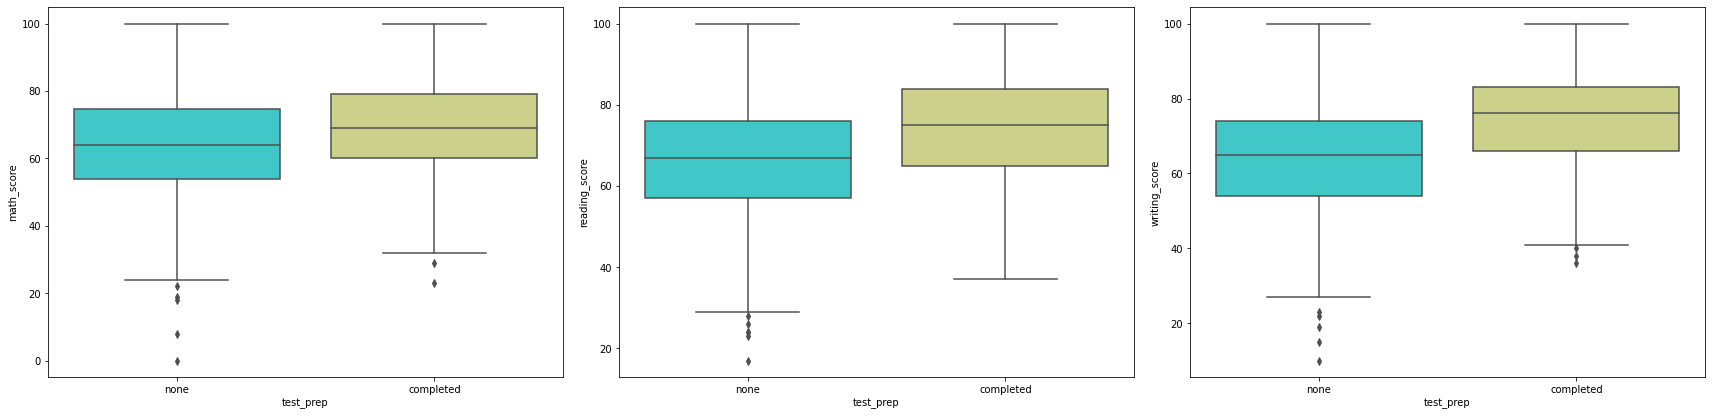

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
sns.boxplot(x="test_prep", y="math_score", data=df, palette="rainbow", ax=ax[0])
sns.boxplot(x="test_prep", y="reading_score", data=df, palette="rainbow", ax=ax[1])
sns.boxplot(x="test_prep", y="writing_score", data=df, palette="rainbow", ax=ax[2])
plt.tight_layout(pad=1.5)

#### Normalize labels using LabelEncoder

In [17]:
le = LabelEncoder()
df["race_group"] = df["race_group"].replace("group A", 1)
df["race_group"] = df["race_group"].replace("group B", 2)
df["race_group"] = df["race_group"].replace("group C", 3)
df["race_group"] = df["race_group"].replace("group D", 4)
df["race_group"] = df["race_group"].replace("group E", 5)
for i in df.columns:
    if i not in ["race_group", "math_score", "reading_score", "writing_score"]:
        df[i] = le.fit_transform(df[i])

#### Correlation heatmap (normalized data)

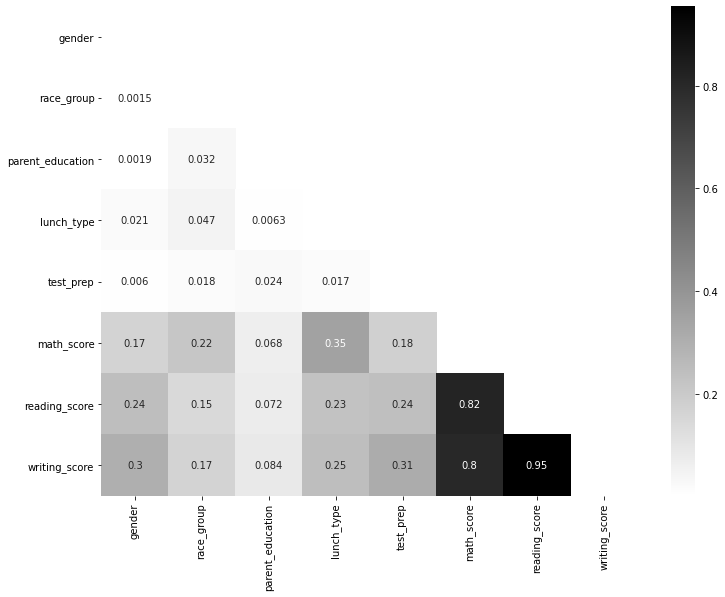

In [18]:
fig, ax = plt.subplots(figsize=(12, 9))
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap="gray_r")

### Model: Linear Regression

#### Predicting math score

In [19]:
X = df.drop("math_score", axis=1)
y = df["math_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [20]:
print("\n", "Scores (Trained)", "\n")
print("MSE:", mean_squared_error(y_train, y_pred))
print("R-Squared:", r2_score(y_train, y_pred))
print("\n", "Scores (Test)", "\n")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R-Squared:", r2_score(y_test, y_test_pred))


 Scores (Trained) 

MSE: 30.315709730197874
R-Squared: 0.8700895857870928

 Scores (Test) 

MSE: 32.07212946350624
R-Squared: 0.8528183075613461


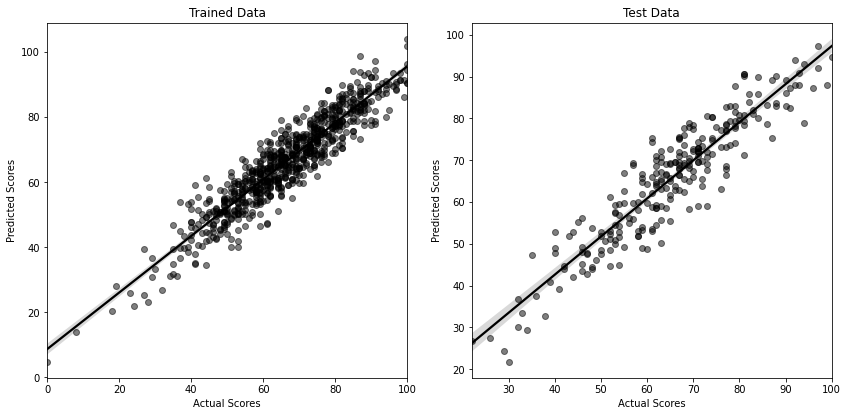

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.regplot(y_train, y_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[0],)
ax[0].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Trained Data")
sns.regplot(y_test, y_test_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[1])
ax[1].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Test Data")
plt.tight_layout(pad=1.5)

#### Predict reading score

In [22]:
X = df.drop("reading_score", axis=1)
y = df["reading_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [23]:
print("\n", "Scores (Trained)", "\n")
print("MSE:", mean_squared_error(y_train, y_pred))
print("R-Squared:", r2_score(y_train, y_pred))
print("\n", "Scores (Test)", "\n")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R-Squared:", r2_score(y_test, y_test_pred))


 Scores (Trained) 

MSE: 16.72779881193411
R-Squared: 0.9216530792786539

 Scores (Test) 

MSE: 15.384106629989612
R-Squared: 0.9269654261832677


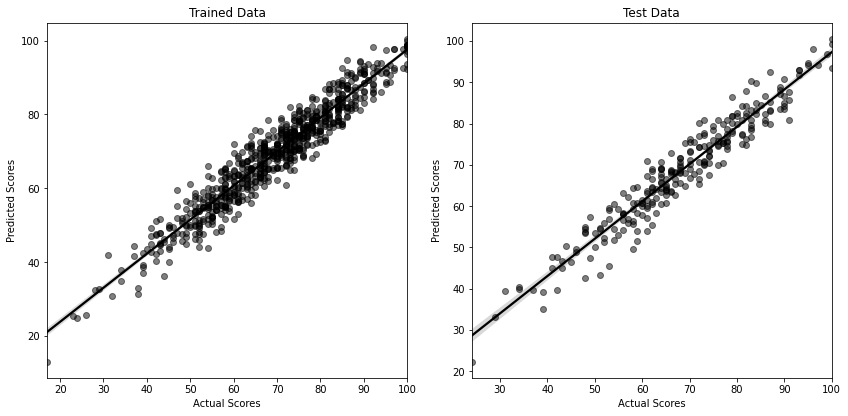

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.regplot(y_train, y_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[0])
ax[0].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Trained Data")
sns.regplot(y_test, y_test_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[1])
ax[1].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Test Data")
plt.tight_layout(pad=1.5)

#### Predict writing score

In [25]:
X = df.drop("writing_score", axis=1)
y = df["writing_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [26]:
print("\n", "Scores (Trained)", "\n")
print("MSE:", mean_squared_error(y_train, y_pred))
print("R-Squared:", r2_score(y_train, y_pred))
print("\n", "Scores (Test)", "\n")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R-Squared:", r2_score(y_test, y_test_pred))


 Scores (Trained) 

MSE: 14.078015243007362
R-Squared: 0.9397455291712956

 Scores (Test) 

MSE: 13.539667394456377
R-Squared: 0.9388796060699424


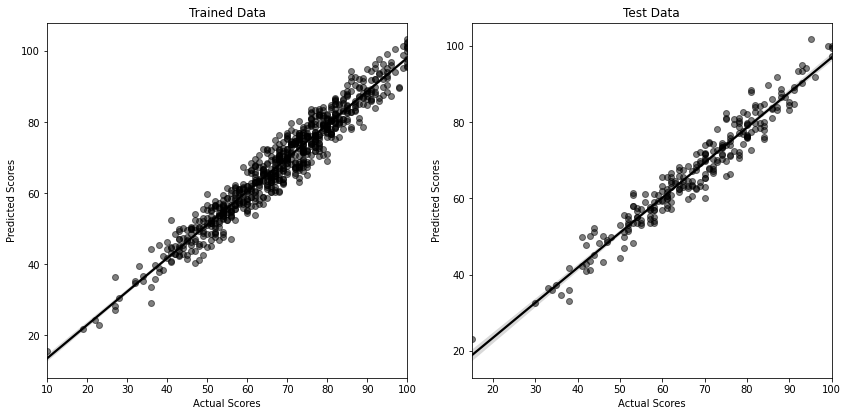

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.regplot(y_train, y_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[0])
ax[0].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Trained Data")
sns.regplot(y_test, y_test_pred, color="black", scatter_kws={"alpha": 0.5}, ax=ax[1])
ax[1].set(xlabel="Actual Scores", ylabel="Predicted Scores", title="Test Data")
plt.tight_layout(pad=1.5)

### Model: Logistic Regression

#### Predict gender

In [28]:
X = df.drop("gender", axis=1)
y = df["gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [29]:
print("\n", "Scores (Trained)", "\n")
print("MSE:", mean_squared_error(y_train, y_pred))
print("R-Squared:", r2_score(y_train, y_pred))
print("\n", "Scores (Test)", "\n")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R-Squared:", r2_score(y_test, y_test_pred))


 Scores (Trained) 

MSE: 0.124
R-Squared: 0.5032051282051282

 Scores (Test) 

MSE: 0.16
R-Squared: 0.35963114754098346


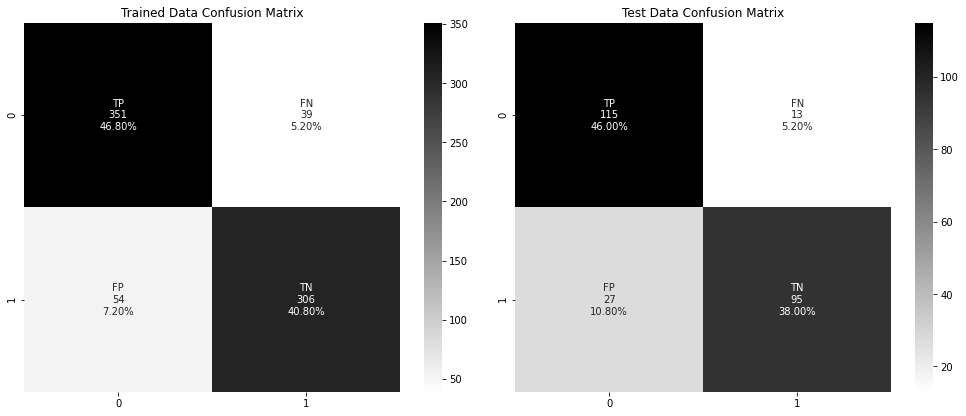

In [30]:
# Helper function to easily create confusion matrix labels
def make_labels(matrix):
    category = ["TP", "FN", "FP", "TN"]
    total = ["{0:0.0f}".format(i) for i in matrix.flatten()]
    percent = ["{0:.2%}".format(i) for i in matrix.flatten() / np.sum(matrix)]
    return np.asarray(["{}\n{}\n{}".format(i, j, k) for i, j, k in zip(category, total, percent)]).reshape(2, 2)

cm_train = confusion_matrix(y_train, y_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6)) 
sns.heatmap(cm_train, annot=make_labels(cm_train), fmt="", cmap="gray_r", ax=ax[0])
ax[0].set(title="Trained Data Confusion Matrix")
sns.heatmap(cm_test, annot=make_labels(cm_test), fmt="", cmap="gray_r", ax=ax[1])
ax[1].set(title="Test Data Confusion Matrix")
plt.tight_layout(pad=1.5)

In [31]:
# Helper function to easily calculate confusion matrix statistics
def calculate_cfsn(matrix):
    TP = matrix[0, 0]
    FN = matrix[0, 1]
    FP = matrix[1, 0]
    TN = matrix[1, 1]
    
    TPR = TP / (TP + FN)  # Sensitivity/Recall/Hit Rate/True Positive Rate
    TNR = TN / (TN + FP)  # Specificity/Selectivity/True Negative Rate
    PPV = TP / (TP + FP)  # Precision/Positive Predictive Value
    NPV = TN / (TN + FN)  # Negative Predictive Value
    FNR = FN / (FN + TP)  # Miss Rate/False Negative Rate
    FPR = FP / (FP + TN)  # Fall-out/False Positive Rate
    FDR = FP / (FP + TP)  # False Discovery Rate
    FOR = FN / (FN + TN)  # False Omission Rate
    PT = (math.sqrt(TPR * (-TNR + 1)) + TNR - 1) / (TPR + TNR - 1)  # Prevalence Threshold
    TS = TP / (TP + FN + FP)  # Threat Score/Critical Success Index
    ACC = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    BA = (TPR + TNR) / 2  # Balanced Accuracy
    F1 = (2 * TP) / ((2 * TP) + FP + FN)  # F1 Score
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))  # Matthews Correlation Coefficient
    FM = math.sqrt((TP / (TP + FP)) * (TP / (TP + FN)))  # Fowlkes-Mallows Index
    BM = TPR + TNR - 1  # Informedness/Bookmaker Informedness
    MK = PPV + NPV - 1  # Markedness/DeltaP
    
    return [TPR, TNR, PPV, NPV, FNR, FPR, FDR, FOR, PT, TS, ACC, BA, F1, MCC, FM, BM, MK]

cm_train_stats = calculate_cfsn(cm_train)
cm_test_stats = calculate_cfsn(cm_test)

print("\n", "Confusion Matrix Statistics (Trained)", "\n")
print("Sensitivity:", cm_train_stats[0])
print("Specificity:", cm_train_stats[1])
print("Precision:", cm_train_stats[2])
print("Miss Rate:", cm_train_stats[3])
print("Fall-out:", cm_train_stats[4])
print("False Discovery Rate:", cm_train_stats[5])
print("False Omission Rate:", cm_train_stats[6])
print("Prevalence Threshold:", cm_train_stats[7])
print("Threat Score:", cm_train_stats[8])
print("Accuracy:", cm_train_stats[9])
print("Balanced Accuracy:", cm_train_stats[10])
print("F1 Score:", cm_train_stats[11])
print("Matthews Correlation Coefficient:", cm_train_stats[12])
print("Fowlkes-Mallows Index:", cm_train_stats[13])
print("Informedness:", cm_train_stats[14])
print("Markedness:", cm_train_stats[15])
print("\n", "Confusion Matrix Statistics (Test)", "\n")
print("Sensitivity:", cm_test_stats[0])
print("Specificity:", cm_test_stats[1])
print("Precision:", cm_test_stats[2])
print("Miss Rate:", cm_test_stats[3])
print("Fall-out:", cm_test_stats[4])
print("False Discovery Rate:", cm_test_stats[5])
print("False Omission Rate:", cm_test_stats[6])
print("Prevalence Threshold:", cm_test_stats[7])
print("Threat Score:", cm_test_stats[8])
print("Accuracy:", cm_test_stats[9])
print("Balanced Accuracy:", cm_test_stats[10])
print("F1 Score:", cm_test_stats[11])
print("Matthews Correlation Coefficient:", cm_test_stats[12])
print("Fowlkes-Mallows Index:", cm_test_stats[13])
print("Informedness:", cm_test_stats[14])
print("Markedness:", cm_test_stats[15])


 Confusion Matrix Statistics (Trained) 

Sensitivity: 0.9
Specificity: 0.85
Precision: 0.8666666666666667
Miss Rate: 0.8869565217391304
Fall-out: 0.1
False Discovery Rate: 0.15
False Omission Rate: 0.13333333333333333
Prevalence Threshold: 0.11304347826086956
Threat Score: 0.28989794855663575
Accuracy: 0.7905405405405406
Balanced Accuracy: 0.876
F1 Score: 0.875
Matthews Correlation Coefficient: 0.8830188679245283
Fowlkes-Mallows Index: 0.7518094115561124
Informedness: 0.8831760866327847
Markedness: 0.75

 Confusion Matrix Statistics (Test) 

Sensitivity: 0.8984375
Specificity: 0.7786885245901639
Precision: 0.8098591549295775
Miss Rate: 0.8796296296296297
Fall-out: 0.1015625
False Discovery Rate: 0.22131147540983606
False Omission Rate: 0.19014084507042253
Prevalence Threshold: 0.12037037037037036
Threat Score: 0.3316918439532481
Accuracy: 0.7419354838709677
Balanced Accuracy: 0.84
F1 Score: 0.838563012295082
Matthews Correlation Coefficient: 0.8518518518518519
Fowlkes-Mallows Index: 0